## 员工离职预测模型

_**snowhyzhang**_  
_**2018-03-12**_

### 前言
本文主要介绍了使用Python来进行数据处理、建模与评估  
本文代码和使用的数据可以在[github](https://github.com/snowhyzhang/yukino/tree/master/pfm_modeling)上找到

### 读取数据

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = None
pfm = pd.read_csv('pfm_train.csv')
display(pfm.head())

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,0,Travel_Rarely,Research & Development,1,4,Life Sciences,77,1,Male,2,2,Manufacturing Director,3,Divorced,5993,1,Y,No,18,3,3,80,1,7,2,4,7,5,0,7
1,54,0,Travel_Frequently,Research & Development,1,4,Life Sciences,1245,4,Female,3,3,Manufacturing Director,3,Divorced,10502,7,Y,No,17,3,1,80,1,33,2,1,5,4,1,4
2,34,1,Travel_Frequently,Research & Development,7,3,Life Sciences,147,1,Male,1,2,Laboratory Technician,3,Single,6074,1,Y,Yes,24,4,4,80,0,9,3,3,9,7,0,6
3,39,0,Travel_Rarely,Research & Development,1,1,Life Sciences,1026,4,Female,2,4,Manufacturing Director,4,Married,12742,1,Y,No,16,3,3,80,1,21,3,3,21,6,11,8
4,28,1,Travel_Frequently,Research & Development,1,3,Medical,1111,1,Male,2,1,Laboratory Technician,2,Divorced,2596,1,Y,No,15,3,1,80,2,1,2,3,1,0,0,0


### 数据探索与预处理

这节我们将对数据先做一个简单的探索与预处理  

分别对数值类型与object类型的数据做数据汇总

In [2]:
num_col = pfm.select_dtypes(['number']).columns
obj_col = pfm.select_dtypes(['object']).columns

观察数值类型数据的汇总

In [3]:
display(pfm.describe())

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.0,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,36.999091,0.161818,9.427273,2.922727,1028.157273,2.725455,2.730909,2.054545,2.732727,6483.620909,2.683636,15.235455,3.152727,2.696364,80.0,0.788182,11.221818,2.807273,2.746364,7.011818,4.207273,2.226364,4.123636
std,9.037230,0.368451,8.196694,1.022242,598.915204,1.098053,0.706366,1.107805,1.109731,4715.293419,2.510017,3.628571,0.359888,1.095356,0.0,0.843347,7.825548,1.291514,0.701121,6.223093,3.618115,3.313830,3.597996
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,504.250000,2.000000,2.000000,1.000000,2.000000,2924.500000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,7.000000,3.000000,1026.500000,3.000000,3.000000,2.000000,3.000000,4857.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,15.000000,4.000000,1556.500000,4.000000,3.000000,3.000000,4.000000,8354.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,29.000000,5.000000,2065.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


观察汇总后，可以发现*EmployeeNumber*这列是员工的编号，我们可以去除；*StandardHours*的标准差为0，即所有值都为80，因此也删去  
我们所要预测的变量*Attrition*，其平均值为0.1618，即1的占比，也就是离职数据的占比为16.18%，可以知道这是一个**不平衡类**的问题  
下面我们观察因子类型的数据汇总

In [4]:
pfm[obj_col].describe()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1100,1100,1100,1100,1100,1100,1100,1100
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,787,727,462,653,247,500,1100,794


我们可以看到*Over18*的数据只有一个值__Y__，因此我们也要删除  
删除*EmployeeNumber*、*StandardHours*和*Over18*这三列

In [5]:
pfm = pfm.drop(['EmployeeNumber', 'StandardHours', 'Over18'], axis=1)

将整数类型转为float类型并对object类型的变量转为dummy variable

In [6]:
num_col = pfm.select_dtypes(['number']).columns
pfm[num_col] = pfm[num_col].astype(np.float64)

pfm = pd.get_dummies(pfm)

### 数据建模

#### 数据预处理

定义预处理器  

- 对数值变量进行标准化
- 使用SMOTE方法进行类平衡
- 将数据集切分为训练集和测试集

In [7]:
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

X = pfm.drop(['Attrition'], axis=1)
y = pfm['Attrition']

num_col = X.select_dtypes(['number']).columns
X.astype(np.float64)
data_mapper = DataFrameMapper([
    (list(num_col), StandardScaler())
])

sm = SMOTE()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

#### 定义模型

接下来我们定义4个模型，进行建模  

- K-近邻模型
- logistics模型
- 随机森林
- 支持向量机

In [8]:
# K-近邻模型
from sklearn.neighbors import KNeighborsClassifier

knn = Pipeline([('scl', data_mapper), 
                ('smote', sm), 
                ('clf', KNeighborsClassifier())])
"""优化超参数 
    - K: 1, 3, 5, 7, 9"""
knn_params = [{'clf__n_neighbors': [2 * i - 1 for i in range(1, 6)]}]

In [9]:
# logistics模型
from sklearn.linear_model import LogisticRegression

lr = Pipeline([('scl', data_mapper), 
               ('smote', sm),
               ('clf', LogisticRegression())])
"""优化超参数
    - C: 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000
    - penalty: l1, l2"""
lr_params = [{'clf__C': [10**i for i in range(-4, 5)], 
              'clf__penalty': ['l1', 'l2']}]

In [10]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier

rf = Pipeline([('smote', sm), 
               # 决策树使用信息增益
               ('clf', RandomForestClassifier(criterion='entropy'))])
"""优化超参数
    - n_trees: 500, 750, 1000, 1250, 1500"""
rf_params = [{'clf__n_estimators': [500, 750, 1000, 1250, 1500]}]

In [11]:
# 支持向量机
from sklearn.svm import SVC

svm = Pipeline([('scl', data_mapper), 
                ('smote', sm), 
                ('clf', SVC(probability=True))])
"""优化超参数
    - C: 500, 750, 1000, 1250, 1500"""
svm_params = [{'clf__C': [10**i for i in range(-4, 5)]}]

#### 模型训练

由于是不平衡类问题，因此我们使用**AUC**作为模型评估性能，通过Grid方法优化超参数

In [12]:
from sklearn.model_selection import GridSearchCV

gs_knn = GridSearchCV(estimator=knn, param_grid=knn_params, cv=10, scoring='roc_auc', n_jobs=-1)
gs_knn.fit(X_train, y_train)

print('best params: %s\nbest score: %.3f' % (gs_knn.best_params_, gs_knn.best_score_))

best params: {'clf__n_neighbors': 9}
best score: 0.713


In [13]:
gs_lr = GridSearchCV(estimator=lr, param_grid=lr_params, cv=10, scoring='roc_auc', n_jobs=-1)
gs_lr.fit(X_train, y_train)

print('best params: %s\nbest score: %.3f' % (gs_lr.best_params_, gs_lr.best_score_))

best params: {'clf__C': 1, 'clf__penalty': 'l2'}
best score: 0.819


In [14]:
gs_rf = GridSearchCV(estimator=rf, param_grid=rf_params, cv = 10, scoring='roc_auc', n_jobs=-1)
gs_rf.fit(X_train, y_train)

print('best params: %s\nbest score: %.3f' % (gs_rf.best_params_, gs_rf.best_score_))

best params: {'clf__n_estimators': 1250}
best score: 0.796


In [15]:
gs_svm = GridSearchCV(estimator=svm, param_grid=svm_params, cv = 10, scoring='roc_auc', n_jobs=-1)
gs_svm.fit(X_train, y_train)

print('best params: %s\nbest score: %.3f' % (gs_svm.best_params_, gs_svm.best_score_))

best params: {'clf__C': 0.1}
best score: 0.779


#### 模型评估

In [16]:
y_preds = {key: value[:, 1]
           for key, value in zip(['KNN', 'Logistic Regression', 'Random Forest', 'SVM'], 
                                 [gs_knn.best_estimator_.predict_proba(X_test), 
                                  gs_lr.best_estimator_.predict_proba(X_test), 
                                  gs_rf.best_estimator_.predict_proba(X_test), 
                                  gs_svm.best_estimator_.predict_proba(X_test)])}

画出ROC曲线

<IPython.core.display.Javascript object>


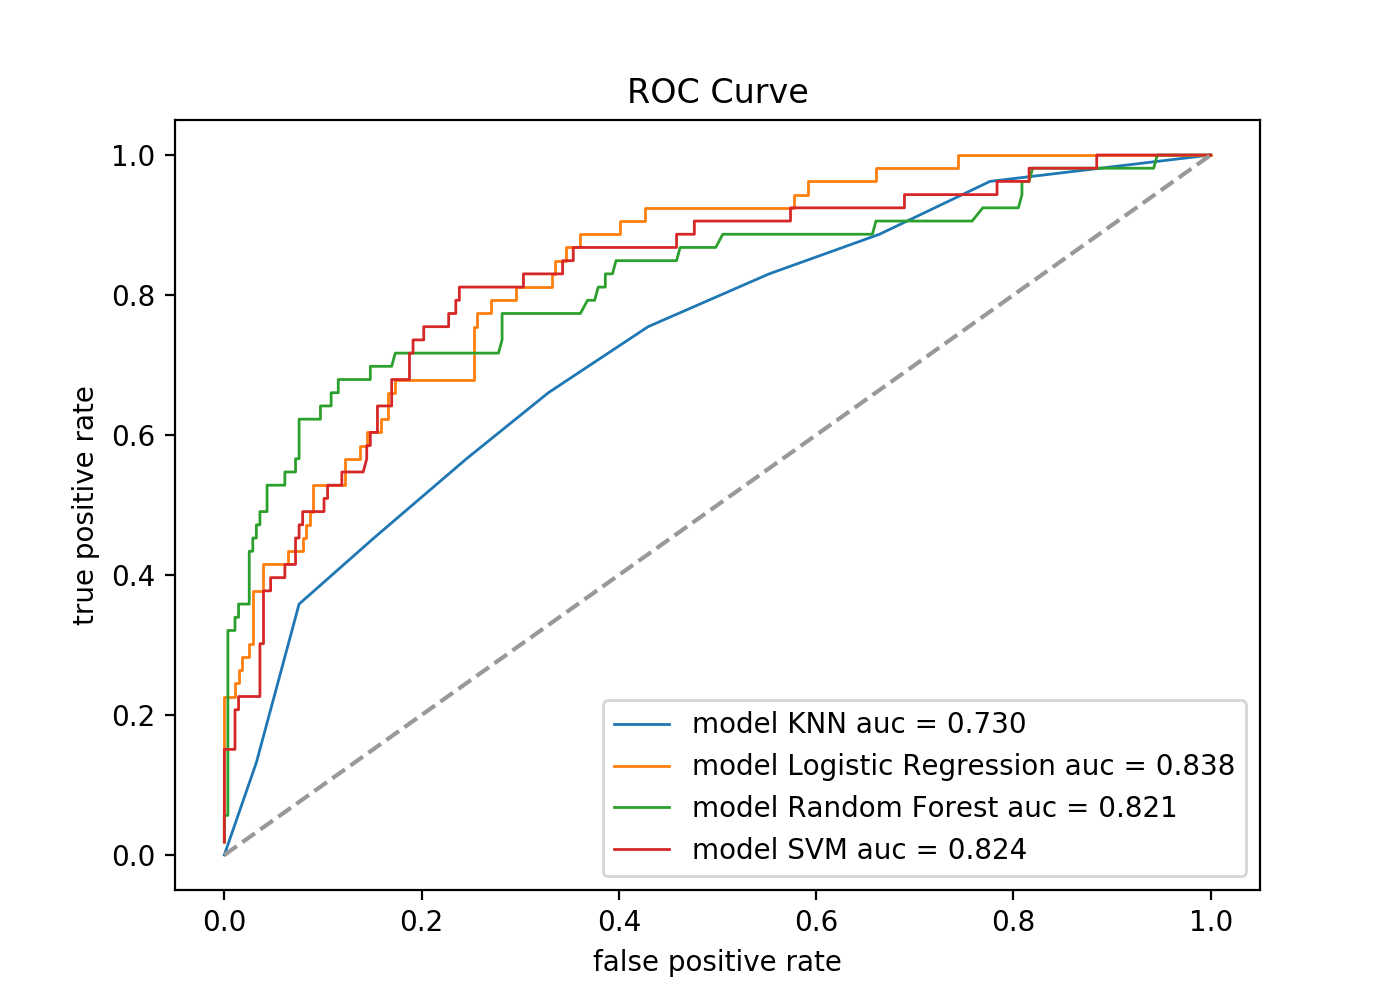

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib notebook

fig = plt.figure(figsize=(7, 5))

for key, value in y_preds.items():
    fpr, tpr, thresholds = roc_curve(y_test, value, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='model %s auc = %.3f' % (key, roc_auc))

plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6))
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

通过比较ROC图我们可以得到最优的模型为**Logistics Regression**